### **Import Libarary**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('hour.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [4]:
df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [5]:
bike = df.copy()
bike.drop(columns=['instant'],axis=1,inplace=True)
bike.rename(columns={'holiday':'is_holiday',
                        'workingday':'is_workingday',
                        'weathersit':'weather_condition',
                        'hum':'humidity',
                        'cnt':'count',
                        'mnth':'month',
                        'yr':'year'
                     },inplace=True)
bike['dteday'] = pd.to_datetime(bike['dteday'])
bike['year'] = bike['dteday'].dt.year
bike['month'] = bike['dteday'].dt.month
bike['day'] = bike['dteday'].dt.day
bike['temp'] = bike['temp']*41
bike['atemp'] = bike['atemp']*50
bike['windspeed'] = bike['windspeed']*67
bike['humidity'] = bike['humidity']*100
bike['weekday'] = bike['weekday'].map({1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',0:'Sunday'})
bike['weather_condition'] = bike['weather_condition'].map({1:'Clear', 2:'Cloudy', 3:'Light Rain', 4:'Heavy Rain'})
bike['season'] = bike['season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
bike['month'] = bike['month'].map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})
bike['is_holiday'] = bike['is_holiday'].map({0:'No', 1:'Yes'})
bike['is_workingday'] = bike['is_workingday'].map({0:'No', 1:'Yes'})
bike

,dteday,season,year,month,hr,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count,day
0,2011-01-01,Spring,2011,January,0,No,Saturday,No,Clear,9.84,14.395,81.0,0.0000,3,13,16,1
1,2011-01-01,Spring,2011,January,1,No,Saturday,No,Clear,9.02,13.635,80.0,0.0000,8,32,40,1
2,2011-01-01,Spring,2011,January,2,No,Saturday,No,Clear,9.02,13.635,80.0,0.0000,5,27,32,1
3,2011-01-01,Spring,2011,January,3,No,Saturday,No,Clear,9.84,14.395,75.0,0.0000,3,10,13,1
4,2011-01-01,Spring,2011,January,4,No,Saturday,No,Clear,9.84,14.395,75.0,0.0000,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,Spring,2012,December,19,No,Monday,Yes,Cloudy,10.66,12.880,60.0,11.0014,11,108,119,31
17375,2012-12-31,Spring,2012,December,20,No,Monday,Yes,Cloudy,10.66,12.880,60.0,11.0014,8,81,89,31
17376,2012-12-31,Spring,2012,December,21,No,Monday,Yes,Clear,10.66,12.880,60.0,11.0014,7,83,90,31
17377,2012-12-31,Spring,2012,December,22,No,Monday,Yes,Clear,10.66,13.635,56.0,8.9981,13,48,61,31


In [6]:
bike['date']= bike['dteday'].dt.day
bike

,dteday,season,year,month,hr,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count,day,date
0,2011-01-01,Spring,2011,January,0,No,Saturday,No,Clear,9.84,14.395,81.0,0.0000,3,13,16,1,1
1,2011-01-01,Spring,2011,January,1,No,Saturday,No,Clear,9.02,13.635,80.0,0.0000,8,32,40,1,1
2,2011-01-01,Spring,2011,January,2,No,Saturday,No,Clear,9.02,13.635,80.0,0.0000,5,27,32,1,1
3,2011-01-01,Spring,2011,January,3,No,Saturday,No,Clear,9.84,14.395,75.0,0.0000,3,10,13,1,1
4,2011-01-01,Spring,2011,January,4,No,Saturday,No,Clear,9.84,14.395,75.0,0.0000,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,Spring,2012,December,19,No,Monday,Yes,Cloudy,10.66,12.880,60.0,11.0014,11,108,119,31,31
17375,2012-12-31,Spring,2012,December,20,No,Monday,Yes,Cloudy,10.66,12.880,60.0,11.0014,8,81,89,31,31
17376,2012-12-31,Spring,2012,December,21,No,Monday,Yes,Clear,10.66,12.880,60.0,11.0014,7,83,90,31,31
17377,2012-12-31,Spring,2012,December,22,No,Monday,Yes,Clear,10.66,13.635,56.0,8.9981,13,48,61,31,31


### **THE GROWTH OF BIKE RENTAL**

### **TIME VARIABLES**

#### **MONTH**

In [7]:
order_mth = pd.CategoricalDtype(
    ['January','February','March','April','May','June', 'July', 'August', 'September','October','November','December'], 
    ordered=True
)

In [8]:
bike_mth = pd.DataFrame(bike.groupby(['year','month']).sum()[['casual','registered','count']]).reset_index()
bike_mth['month']=bike_mth['month'].astype(order_mth)
bike_mth = bike_mth.sort_values(['year','month'])
bike_mth

,year,month,casual,registered,count
4,2011,January,3073,35116,38189
3,2011,February,6242,41973,48215
7,2011,March,12826,51219,64045
0,2011,April,22346,72524,94870
8,2011,May,31050,104771,135821
6,2011,June,30612,112900,143512
5,2011,July,36452,104889,141341
1,2011,August,28842,107849,136691
11,2011,September,26545,100873,127418
10,2011,October,25222,98289,123511


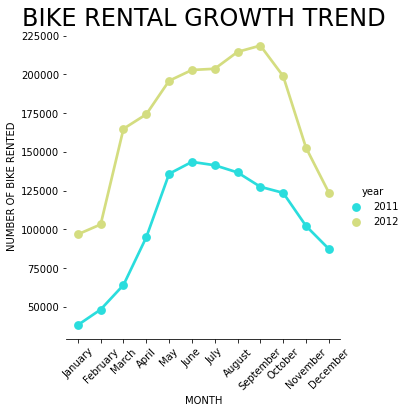

In [9]:
sns.catplot(data=bike_mth, x='month', y='count', hue='year', palette='rainbow',kind='point',figsize=(15,5))                # create plot 
sns.despine(top=True, right=True, left=True, bottom=False)                                      # remove border
plt.xticks(rotation=45)
plt.xlabel('MONTH')                                                                             # axis label
plt.ylabel('NUMBER OF BIKE RENTED')
plt.title('BIKE RENTAL GROWTH TREND', size=24, y=1.12)                                          # add the title, title size, and the distance between title and plot

plt.show()

The graphs show us that there is increase in bike rented from Januari 2011 until June 2011 and it begin to descend slowly until December 2011. The next year, 2012, the trend is mostly the same but the increase go further until September 2012. And for the most rented bike happen in September 2012 with more than 200.000 bike rented. <br>
From these evidence, we **assume** that most of people will use bike when the condition outside is quite comfortable, because the increase of bike rented are occured in spring-summer-fall months repeatedly in 2011 and 2012. We would like to explore more if there are any relation or effect of Natural Condition that will affect the number of bike rented.

### **SEASON**

In [10]:
bike_season = pd.DataFrame(bike.groupby(['year','season']).sum()[['casual','registered','count']]).reset_index()
bike_season

,year,season,casual,registered,count
0,2011,Fall,95450,324200,419650
1,2011,Spring,21425,128575,150000
2,2011,Summer,77564,269752,347316
3,2011,Winter,52813,273324,326137
4,2012,Fall,130641,510838,641479
5,2012,Spring,39197,282151,321348
6,2012,Summer,125958,445315,571273
7,2012,Winter,76969,438507,515476


In [11]:
order_season = pd.CategoricalDtype(
    ['Spring', 'Summer', 'Fall', 'Winter'], 
    ordered=True
)

In [12]:
bike_season['season']=bike_season['season'].astype(order_season)
bike_season = bike_season.sort_values('season')
bike_season

,year,season,casual,registered,count
1,2011,Spring,21425,128575,150000
5,2012,Spring,39197,282151,321348
2,2011,Summer,77564,269752,347316
6,2012,Summer,125958,445315,571273
0,2011,Fall,95450,324200,419650
4,2012,Fall,130641,510838,641479
3,2011,Winter,52813,273324,326137
7,2012,Winter,76969,438507,515476


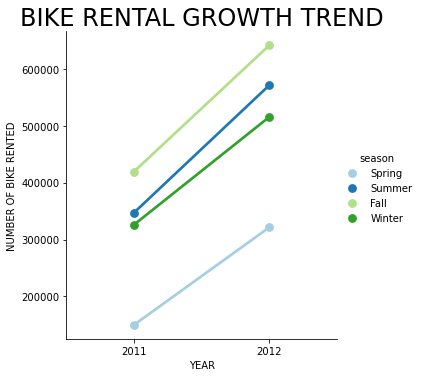

In [13]:
sns.catplot(data = bike_season, x='year',y='count',hue='season',ci=None,palette='Paired',kind='point')  # create barplot 
sns.despine(top=True, right=True, left=False, bottom=False)                                # remove border

plt.xlabel('YEAR')                                                                         # axis lablel 
plt.ylabel('NUMBER OF BIKE RENTED')
plt.title('BIKE RENTAL GROWTH TREND', size=24, y=1.12)                                     # add the title, title size, and the distance between title and plot

plt.show()

In [14]:
fall = bike[(bike['season']=='Fall') & (bike['year']==2012)].groupby(['season','month','day']).sum()[['casual','registered','count']]
fall = pd.DataFrame(fall).reset_index()
fall

,season,month,day,casual,registered,count
0,Fall,August,1,1074,6506,7580
1,Fall,August,2,983,6278,7261
2,Fall,August,3,1328,5847,7175
3,Fall,August,4,2345,4479,6824
4,Fall,August,5,1707,3757,5464
...,...,...,...,...,...,...
89,Fall,September,18,371,3702,4073
90,Fall,September,19,788,6803,7591
91,Fall,September,20,939,6781,7720
92,Fall,September,21,1250,6917,8167


In [15]:
order_month = pd.CategoricalDtype(
    ['June', 'July', 'August', 'September'], 
    ordered=True
)

In [16]:
fall['month']=fall['month'].astype(order_month)
fall = fall.sort_values(['month','day'])
fall

,season,month,day,casual,registered,count
62,Fall,June,21,778,5127,5905
63,Fall,June,22,964,4859,5823
64,Fall,June,23,2657,4801,7458
65,Fall,June,24,2551,4340,6891
66,Fall,June,25,1139,5640,6779
...,...,...,...,...,...,...
89,Fall,September,18,371,3702,4073
90,Fall,September,19,788,6803,7591
91,Fall,September,20,939,6781,7720
92,Fall,September,21,1250,6917,8167


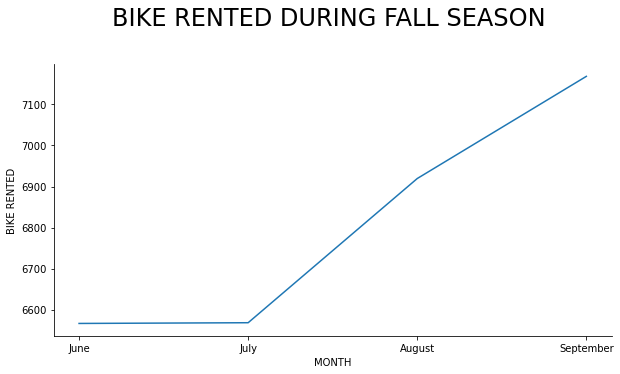

In [17]:
plt.figure(figsize=(10,5))                                          # create figure with size (8,6)
sns.lineplot(data = fall, x='month',y='count',ci=None)            # create plot 
sns.despine(top=True, right=True, left=False, bottom=False)                     # remove border
plt.xlabel('MONTH')                                                             # axis label
plt.ylabel('BIKE RENTED')
plt.title('BIKE RENTED DURING FALL SEASON ', size=24, y=1.12)                   # add the title, title size, and the distance between title and plot

plt.show()

In [18]:
fall_2012 = bike[(bike['season']=='Fall') & (bike['year']==2012)]
fall_2012

,dteday,season,year,month,hr,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count,day,date
12763,2012-06-21,Fall,2012,June,0,No,Thursday,Yes,Clear,30.34,34.850,70.0,6.0032,16,53,69,21,21
12764,2012-06-21,Fall,2012,June,1,No,Thursday,Yes,Clear,29.52,34.850,79.0,8.9981,2,16,18,21,21
12765,2012-06-21,Fall,2012,June,2,No,Thursday,Yes,Clear,29.52,34.850,79.0,7.0015,11,7,18,21,21
12766,2012-06-21,Fall,2012,June,3,No,Thursday,Yes,Clear,29.52,34.850,74.0,0.0000,3,8,11,21,21
12767,2012-06-21,Fall,2012,June,4,No,Thursday,Yes,Clear,28.70,33.335,84.0,6.0032,1,11,12,21,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15014,2012-09-22,Fall,2012,September,19,No,Saturday,No,Clear,28.70,32.575,58.0,12.9980,99,308,407,22,22
15015,2012-09-22,Fall,2012,September,20,No,Saturday,No,Clear,28.70,32.575,54.0,16.9979,76,249,325,22,22
15016,2012-09-22,Fall,2012,September,21,No,Saturday,No,Clear,26.24,31.060,57.0,16.9979,59,202,261,22,22
15017,2012-09-22,Fall,2012,September,22,No,Saturday,No,Clear,25.42,31.060,57.0,12.9980,59,180,239,22,22


In [19]:
fall_day = pd.DataFrame(fall_2012.groupby(['weekday']).sum()[['casual','registered','count']]).reset_index()
fall_day

,weekday,casual,registered,count
0,Friday,16984,79503,96487
1,Monday,14864,73383,88247
2,Saturday,30242,62122,92364
3,Sunday,25721,54593,80314
4,Thursday,14716,84564,99280
5,Tuesday,12842,75951,88793
6,Wednesday,15272,80722,95994


In [20]:
order_weekday = pd.CategoricalDtype(
    ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday'], 
    ordered=True
)

In [21]:
fall_day['weekday']=fall_day['weekday'].astype(order_weekday)
fall_day = fall_day.sort_values('weekday')
fall_day

,weekday,casual,registered,count
3,Sunday,25721,54593,80314
1,Monday,14864,73383,88247
5,Tuesday,12842,75951,88793
6,Wednesday,15272,80722,95994
4,Thursday,14716,84564,99280
0,Friday,16984,79503,96487
2,Saturday,30242,62122,92364


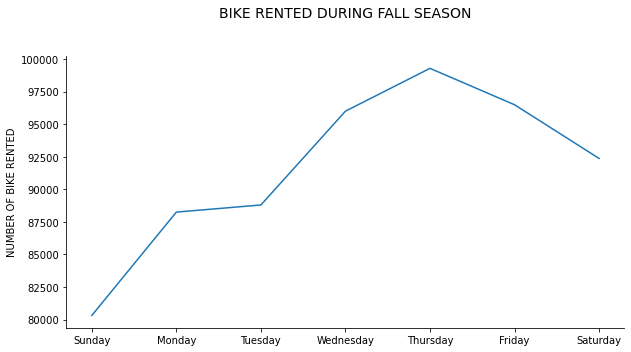

In [22]:
plt.figure(figsize=(10,5)) 
sns.lineplot(data = fall_day, x='weekday',y='count',ci=None, palette='Blues')    # create plot 
sns.despine(top=True, right=True, left=False, bottom=False)                     # remove border
plt.xlabel('')                                                                  # axis lablel 
plt.ylabel('NUMBER OF BIKE RENTED')
plt.title('BIKE RENTED DURING FALL SEASON', size=14, y=1.12)                    # add the title, title size, and the distance between title and plot

plt.show()

By separating for each season, we can see from the graph that people tend to use bike in Fall Season (it appears that every fall is the highest number of bike rented each year). And by that, we breakdown more into Fall 2012. And we found that September is the month where the bike number at its peak. Followed with the occasion that on Thursday people use bike more eventhough the distribution for days are about the same.

### **NATURAL CONDITION VARIABLES**

In [23]:
natcon = bike.groupby(['season','month','day']).mean()[['temp','atemp','humidity','windspeed']].reset_index()
natcon['month']=natcon['month'].astype(order_month)
natcon = natcon.sort_values(['month','day'])
natcon

,season,month,day,temp,atemp,humidity,windspeed
215,Summer,June,1,29.075833,33.223229,71.625000,14.895915
216,Summer,June,2,26.615833,30.255729,42.708333,16.041475
217,Summer,June,3,25.061250,29.056667,42.375000,14.646479
218,Summer,June,4,25.266250,29.324479,47.166667,13.667162
219,Summer,June,5,24.377917,28.567396,63.291667,11.666933
...,...,...,...,...,...,...,...
104,Spring,NaN,31,12.829583,15.940208,59.666667,12.562500
164,Spring,NaN,31,11.702083,14.189167,51.020833,15.041779
245,Summer,NaN,31,14.196250,16.982083,82.833333,15.686794
276,Summer,NaN,31,29.827500,33.917812,56.479167,10.271379


In [24]:
fall_temp = pd.DataFrame(bike[(bike['season']=='Fall') & (bike['year']==2012)].groupby(['season','month','day']).mean()[['temp','atemp','humidity','windspeed']]).reset_index()
fall_temp['month']=fall_temp['month'].astype(order_month)
fall_temp = fall_temp.sort_values(['month','day'])
fall_temp

,season,month,day,temp,atemp,humidity,windspeed
62,Fall,June,21,33.039167,37.627083,56.791667,7.958762
63,Fall,June,22,31.877500,36.206042,57.375000,12.250392
64,Fall,June,23,29.998333,32.639583,53.458333,12.041296
65,Fall,June,24,30.476667,33.712708,47.916667,9.750175
66,Fall,June,25,29.349167,32.702083,50.416667,20.125683
...,...,...,...,...,...,...,...
89,Fall,September,18,25.556667,28.253333,87.250000,23.958363
90,Fall,September,19,22.652500,27.020208,53.666667,14.416725
91,Fall,September,20,22.413333,26.609583,61.833333,7.917167
92,Fall,September,21,24.565833,28.598542,66.875000,10.333354


### **TEMPERATURE**

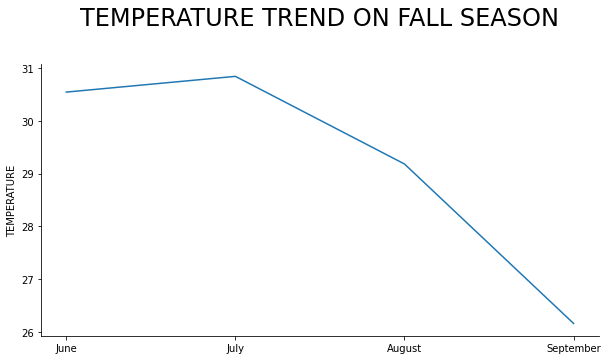

In [25]:
plt.figure(figsize=(10,5))                                                                      # create figure with size (10,5)

sns.lineplot(data = fall_temp, x='month',y='temp',ci=None)                                      # create plot 
sns.despine(top=True, right=True, left=False, bottom=False)                                     # remove border
plt.xlabel('')                                                                                  # axis label
plt.ylabel('TEMPERATURE')
plt.title('TEMPERATURE TREND ON FALL SEASON', size=24, y=1.12)                                  # add the title, title size, and the distance between title and plot                                                                      # removing xticklabels

plt.show()

### **HUMIDITY**

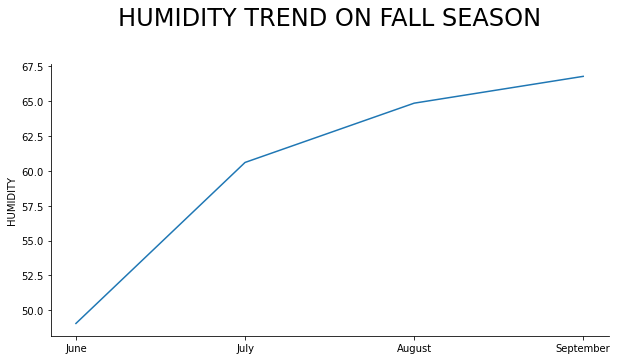

In [27]:
plt.figure(figsize=(10,5))                                                 # create figure with size (20,8)
sns.lineplot(data = fall_temp, x='month',y='humidity',ci=None)                                     # create plot 
sns.despine(top=True, right=True, left=False, bottom=False)                                # remove border
plt.xlabel('')                                                                        # axis label
plt.ylabel('HUMIDITY')
plt.title('HUMIDITY TREND ON FALL SEASON', size=24, y=1.12)                                # add the title, title size, and the distance between title and plot

plt.show()

### **WINDSPEED**

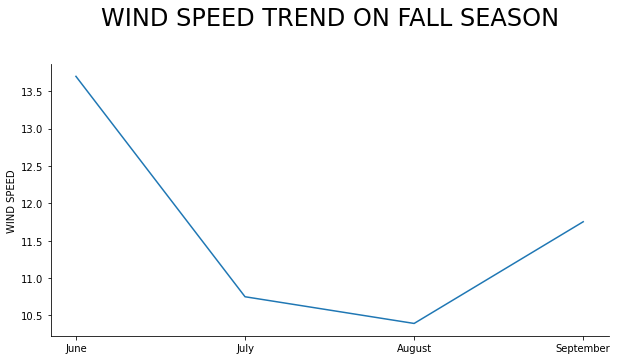

In [29]:
plt.figure(figsize=(10,5))                                                          # create figure with size (20,8)

sns.lineplot(data = fall_temp, x='month', y='windspeed',ci=None)             # create plot 
sns.despine(top=True, right=True, left=False, bottom=False)                                     # remove border
plt.xlabel('')                                                                                  # axis label
plt.ylabel('WIND SPEED')
plt.title('WIND SPEED TREND ON FALL SEASON', size=24, y=1.12)                                   # add the title, title size, and the distance between title and plot


plt.show()

The three graphs above shows the trend of temperature, humidity and windspeed in fall season. For temperature, in fall season range from 22 - 37. Which appear decreasing or become more cold as we go into September. The humidity increase as we go into September. The windspeed is decreasing until August and began to increase sligthly in September.

### **EFFECT OF TEMPERATURE AND WEATHER CONDITION ON BIKE RENTED**

In [30]:
bike_weather = pd.DataFrame(bike.groupby(['hr','year','weekday','day','month','weather_condition']).sum()[['casual','registered','count']]).reset_index()
bike_weather

,hr,year,weekday,day,month,weather_condition,casual,registered,count
0,0,2011,Friday,1,April,Light Rain,0,6,6
1,0,2011,Friday,1,July,Clear,20,48,68
2,0,2011,Friday,2,December,Clear,6,32,38
3,0,2011,Friday,2,September,Clear,6,58,64
4,0,2011,Friday,3,June,Clear,15,53,68
...,...,...,...,...,...,...,...,...,...
17374,23,2012,Wednesday,28,November,Clear,5,73,78
17375,23,2012,Wednesday,29,August,Clear,34,123,157
17376,23,2012,Wednesday,29,February,Light Rain,3,30,33
17377,23,2012,Wednesday,30,May,Clear,39,121,160


In [31]:
bike_weather2 = bike.groupby(['hr','year','weekday','day','month','weather_condition']).mean()[['temp']]
bike_weather2 = pd.DataFrame(bike_weather2).reset_index()
bike_weather2

,hr,year,weekday,day,month,weather_condition,temp
0,0,2011,Friday,1,April,Light Rain,10.66
1,0,2011,Friday,1,July,Clear,27.06
2,0,2011,Friday,2,December,Clear,10.66
3,0,2011,Friday,2,September,Clear,26.24
4,0,2011,Friday,3,June,Clear,25.42
...,...,...,...,...,...,...,...
17374,23,2012,Wednesday,28,November,Clear,10.66
17375,23,2012,Wednesday,29,August,Clear,27.06
17376,23,2012,Wednesday,29,February,Light Rain,17.22
17377,23,2012,Wednesday,30,May,Clear,27.06


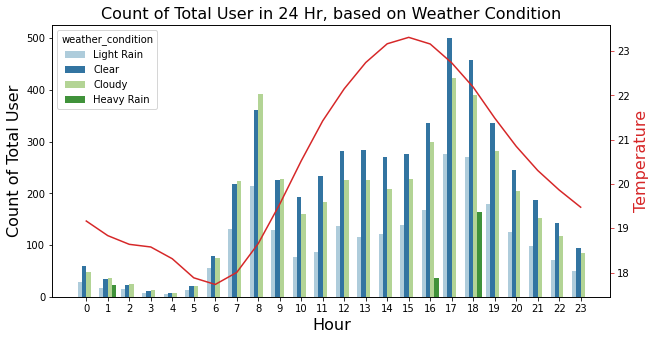

In [32]:
#Create combo chart
fig, ax1 = plt.subplots(figsize=(10,5))
color = 'tab:green'
#bar plot creation
ax1 = sns.barplot(x='hr', y='count',hue='weather_condition', data = bike_weather, palette='Paired',ci=None)
ax1.set_title('Count of Total User in 24 Hr, based on Weather Condition', fontsize=16)
ax1.set_xlabel('Hour', fontsize=16)
ax1.set_ylabel('Count of Total User', fontsize=16)

ax1.tick_params(axis='y')
#specify we want to share the same x-axis

ax2 = ax1.twinx()
color = 'tab:red'
ax2 = sns.lineplot(x='hr', y='temp', data = bike_weather2, sort=False, color=color,ci=None)
#line plot creation
ax2.set_ylabel('Temperature', fontsize=16,color=color)

ax2.tick_params(axis='y', color=color)
#show plot
plt.show()

This graph shows us that most of people will rent bike during clear condition defiying the how many temperature outside will be. They follow on hourly behaviour.

### **USER TYPE**


In [33]:
user = bike.groupby(['month','year']).sum()[['casual','registered','count']].sort_values('month')
user = pd.DataFrame(user).reset_index()
user['month']=user['month'].astype(order_mth)
user = user.sort_values('month')
user

,month,year,casual,registered,count
8,January,2011,3073,35116,38189
9,January,2012,8969,87775,96744
6,February,2011,6242,41973,48215
7,February,2012,8721,94416,103137
15,March,2012,31618,133257,164875
14,March,2011,12826,51219,64045
0,April,2011,22346,72524,94870
1,April,2012,38456,135768,174224
17,May,2012,44235,151630,195865
16,May,2011,31050,104771,135821


### **CASUAL USER**

<Figure size 720x360 with 0 Axes>

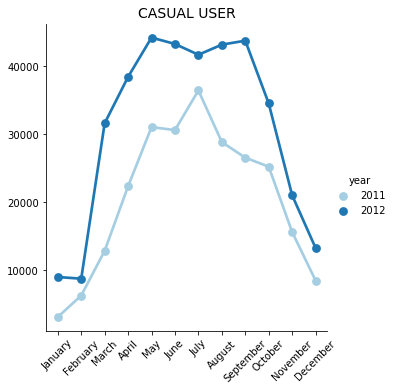

In [34]:
plt.figure(figsize=(10,5))   
sns.catplot(data = user, x='month',y='casual',hue='year',ci=None,palette='Paired',kind='point')      # createplot 
sns.despine(top=True, right=True, left=False, bottom=False)                             # remove border  
plt.xticks(rotation=45)
plt.xlabel('')                                                                          # axis lablel 
plt.ylabel('')

plt.title('CASUAL USER', size=14, y=1.12)                                               # add the title, title size, and the distance between title and plot

plt.show()

### **REGISTERED USER**

<Figure size 720x360 with 0 Axes>

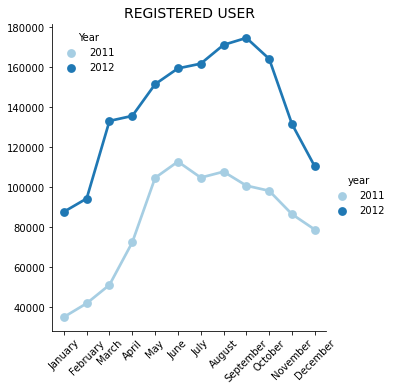

In [35]:
plt.figure(figsize=(10,5))                                                  # create figure with size (20,6)

sns.catplot(data = user, x='month',y='registered',hue='year',ci=None,palette='Paired',kind='point')  # createplot 
sns.despine(top=True, right=True, left=False, bottom=False)                             # remove border
plt.legend(title='Year', loc='best', frameon=False)                                     # add legend labels
plt.xticks(rotation=45)
plt.xlabel('')                                                                          # axis lablel 
plt.ylabel('')

plt.title('REGISTERED USER', size=14, y=1.12)                                           # add the title, title size, and the distance between title and plot

plt.show()

The user of rented bike increase from 2011 to 2012. For casual user they begin to increase significantly in March, and they go steady until September. Casual user prefer bike rent lessly during winter season which is start at October until December. In another case, the registered user shows increase steadily over the year with the top at September.

### **USER BEHAVIOUR**

### **TOTALUSER**

In [36]:
plt.figure(figsize=(10,5))                                                      # create figure with size (20,6)

sns.catplot(data = bike_hour, x='hr',y='count',hue='weekday',ci=None,palette='Paired',kind='point') # createplot 
sns.despine(top=True, right=True, left=False, bottom=False)                                 # remove border
                                        # add legend labels

plt.xlabel('TIME')                                                                          # axis lablel 
plt.ylabel('BIKE RENTED BY REGISTERED USER')

plt.title('TIME DISTRIBUTION OF BIKE RENTED BY REGISTERED USER', size=14, y=1.12)           # add the title, title size, and the distance between title and plot

plt.show()

NameError: name 'bike_hour' is not defined

<Figure size 720x360 with 0 Axes>

### **CASUAL USER**

In [37]:
bike_hour = bike.groupby(['hr','month','year','weekday','is_holiday']).sum()[['casual','registered','count']].sort_values('hr')
bike_hour = pd.DataFrame(bike_hour).reset_index()
bike_hour

,hr,month,year,weekday,is_holiday,casual,registered,count
0,0,April,2011,Friday,No,18,94,112
1,0,March,2012,Tuesday,No,11,62,73
2,0,March,2012,Wednesday,No,13,104,117
3,0,May,2011,Friday,No,48,177,225
4,0,May,2011,Monday,No,139,170,309
...,...,...,...,...,...,...,...,...
4502,23,January,2011,Monday,Yes,1,3,4
4503,23,January,2011,Saturday,No,25,146,171
4504,23,January,2011,Sunday,No,9,65,74
4505,23,February,2012,Saturday,No,23,232,255


<Figure size 720x360 with 0 Axes>

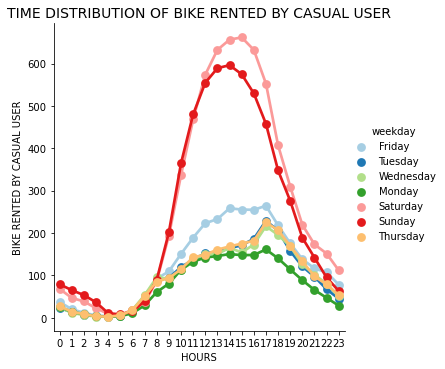

In [38]:
plt.figure(figsize=(10,5))                                                 # create figure with size (20,6)

sns.catplot(data = bike_hour, x='hr',y='casual',hue='weekday',ci=None,palette='Paired',kind='point') # createplot 
sns.despine(top=True, right=True, left=False, bottom=False)
plt.xlabel('HOURS')                                                                     # axis lablel 
plt.ylabel('BIKE RENTED BY CASUAL USER')

plt.title('TIME DISTRIBUTION OF BIKE RENTED BY CASUAL USER', size=14, y=1.12)           # add the title, title size, and the distance between title and plot

plt.show()

### **REGISTERED USER**

<Figure size 720x360 with 0 Axes>

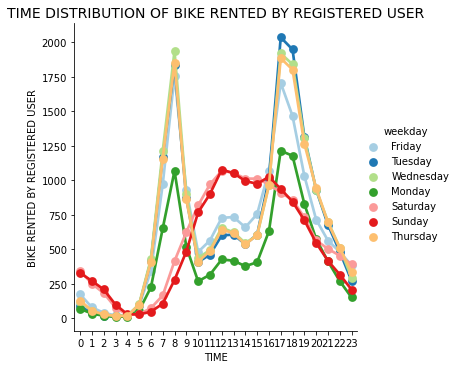

In [39]:
plt.figure(figsize=(10,5))                                                      # create figure with size (10,5)
sns.catplot(data = bike_hour, x='hr',y='registered',hue='weekday',ci=None,palette='Paired',kind='point') # createplot 
sns.despine(top=True, right=True, left=False, bottom=False)                                 # remove border                                        # add legend labels
plt.xlabel('TIME')                                                                          # axis lablel 
plt.ylabel('BIKE RENTED BY REGISTERED USER')
plt.title('TIME DISTRIBUTION OF BIKE RENTED BY REGISTERED USER', size=14, y=1.12)           # add the title, title size, and the distance between title and plot
plt.show()

From graph above, we can conclude that the usage of rent bike by casual user are mostly during weekend. It shows that on the weekday the usage are pretty low, but it goes highly up on weekend during 9 to 20. Meanwhile, the usage of rent bike by registered user are commonly for commuting during weekdays, which can be seen from the graph the number start increasing during the commute hour. This pattern is repeating for every weekday (with near count value), it's possible we can estimate when the bike need to maintain such as check the tire, brake, pedals, ect, to fit the bike still in good condition, the time might be in working days monday to friday in the afternoon about 9-15.

### **HOLIDAY**

In [40]:
holiday_effect = pd.DataFrame(bike.groupby(['month','is_holiday','weekday']).sum()[['casual','registered','count']]).reset_index()
holiday_effect['month']=holiday_effect['month'].astype(order_mth)
holiday_effect['weekday']=holiday_effect['weekday'].astype(order_weekday)
holiday_effect = holiday_effect.sort_values(['month','weekday'])
holiday_effect

,month,is_holiday,weekday,casual,registered,count
36,January,No,Sunday,3049,15110,18159
34,January,No,Monday,666,13353,14019
40,January,Yes,Monday,578,4671,5249
38,January,No,Tuesday,1498,21612,23110
39,January,No,Wednesday,982,16127,17109
...,...,...,...,...,...,...
24,December,Yes,Tuesday,440,573,1013
22,December,No,Wednesday,1573,24590,26163
20,December,No,Thursday,2320,31078,33398
16,December,No,Friday,3004,30678,33682


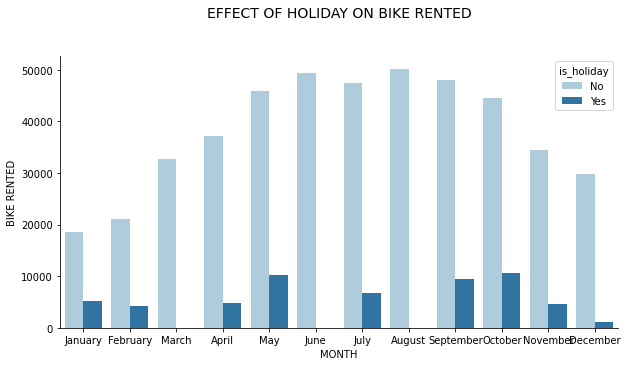

In [41]:
plt.figure(figsize=(10,5))                                                               # create figure with size 

sns.barplot(data = holiday_effect, x='month',y='count',hue='is_holiday',ci=None,palette='Paired')  # createplot 
sns.despine(top=True, right=True, left=False, bottom=False)                                        # remove border                                               # add legend labels
plt.xlabel('MONTH')                                                                                # axis lablel 
plt.ylabel('BIKE RENTED')
plt.title('EFFECT OF HOLIDAY ON BIKE RENTED', size=14, y=1.12)                                     # add the title, title size, and the distance between title and plot

plt.show()

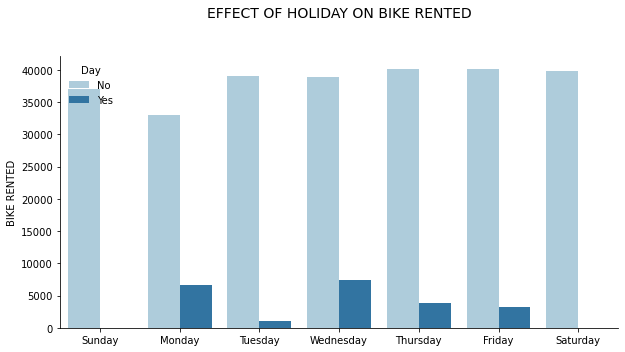

In [42]:
plt.figure(figsize=(10,5))                                                          # create figure with size

sns.barplot(data = holiday_effect, x='weekday',y='count',hue='is_holiday',ci=None,palette='Paired')  # createplot 
sns.despine(top=True, right=True, left=False, bottom=False)                                        # remove border
plt.legend(title='Day', loc='upper left', frameon=False)                                                 # add legend labels
plt.xlabel('')                                                                                # axis lablel 
plt.ylabel('BIKE RENTED')
plt.title('EFFECT OF HOLIDAY ON BIKE RENTED', size=14, y=1.12)                                     # add the title, title size, and the distance between title and plot

plt.show()

In [43]:
sum_hol = pd.DataFrame(bike.groupby('is_holiday').sum()[['count']]).reset_index()
sum_hol

,is_holiday,count
0,No,3214244
1,Yes,78435


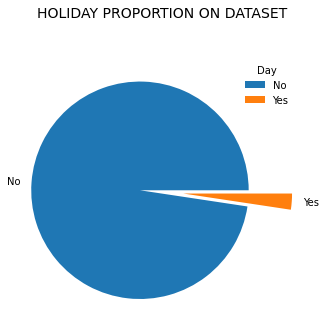

In [44]:
plt.figure(figsize=(10,5))                                                          # create figure with size 

plt.pie(data=sum_hol, x='count', labels='is_holiday', explode=[0.2,0.2])                           # createplot 
sns.despine(top=True, right=True, left=False, bottom=False)                                        # remove border
plt.legend(title='Day', loc='best', frameon=False)                                                 # add legend labels
plt.xlabel('')                                                                                     # axis lablel 
plt.title('HOLIDAY PROPORTION ON DATASET', size=14, y=1.12)                                     # add the title, title size, and the distance between title and plot

plt.show()



These graphs show people ride less on holidays. And the number of holiday on 2011 and 2012 are only a few based on data extracted from dchr.dc.gov . Which means that holiday only will make a small effect on number of bike rented.

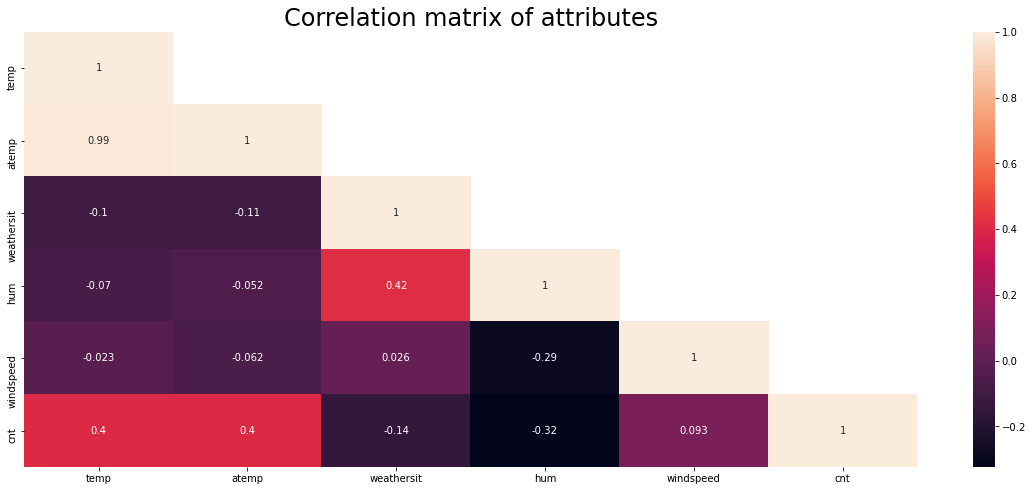

In [45]:
correMtr=df[['temp','atemp','weathersit','hum','windspeed','cnt']].corr()
mask=np.array(correMtr)
mask[np.tril_indices_from(mask)]=False
fig,ax=plt.subplots(figsize=(20,8))
sns.heatmap(correMtr,mask=mask,annot=True)
ax.set_title('Correlation matrix of attributes', size=24, y=1.12)
plt.show()

Based on EDA and Correlation Matrix we can conclude that: <br>

1.   The seasonal effect is too high in bike usage and also, there are different demand levels among the months in the same season. That’s why, both season and month should be used as inputs in the model.
2.   The total of bike usage in 2012 is higher than 2011 which means that both the number of users and de-mand of the system increased by time, so the year attribute should also be used as input in the model.
3. The bike usage is at maximum especially in rush hours. By looking at the relationship between cnt and hr closer, it can be seen that the hours 7, 8, 9, 17, 18, 19, and 20 have different characteristics in working days.
4. As for the weather condition, temperature, humidity and windspeed will be use also as input in the model because in correlation matrix they showed a significant contribution.
5. We do not use atemp because the correlation with the temp is almost one, which if we use atemp it would cause multicollinearity to temp.
6. We do not use casual and registered because the main problem here is to predict the whole number of bike instead of clustering how many bike rented by casual user and registered user





In [46]:
bike.columns

Index(['dteday', 'season', 'year', 'month', 'hr', 'is_holiday', 'weekday',
       'is_workingday', 'weather_condition', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count', 'day', 'date'],
      dtype='object')

In [47]:
data = bike[['season', 'year', 'month','day', 'hr', 'is_holiday',
             'is_workingday', 'weather_condition', 'temp','humidity',
             'windspeed','count']]

In [49]:
data.to_csv(r'bike.csv', index = False, header=True)